In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import requests
import datetime
import time
from collections import Counter
import csv
import duckdb
import folium

In [2]:
#Para cada usuario (id), vai existir um grafo onde os vértices são os estabelecimentos de check-in (location_id)
#Contando o histórico de estabelecimentos que cada usuário realizou check-in
    
#df = pd.read_csv('C:/Users/caca_/Desktop/Gowalla_totalCheckins.csv', sep="	")
df = pd.read_csv("arquivo_final.csv", sep=",")
df.columns = ['id_user', 'time', 'latitude', 'longitude' ,'location_id']

df['time'] = pd.to_datetime(df['time'])

df.head()

,id_user,time,latitude,longitude,location_id
0,17,2010-10-16 00:07:34+00:00,35.046108,-89.827722,864095
1,17,2010-10-14 14:38:26+00:00,35.072080,-89.948233,26904
2,17,2010-09-26 18:05:52+00:00,35.149988,-89.994296,35812
3,17,2010-09-25 21:37:20+00:00,35.176795,-89.916894,1214560
4,17,2010-09-25 18:54:52+00:00,35.154289,-89.993104,4425307


In [3]:
#Número de check-in por usuários

def total_check_users(df):
    number_location = []
    prim = df['id_user'][0]
    
    cont = 1
    
    for i in range(len(df)):
        if i+1 == len(df):
            number_location.append(cont)
        elif df['id_user'][i] == prim:
            cont+=1 
        else:
            number_location.append(cont)
            cont = 1
            prim = df['id_user'][i]

    return number_location

#print(number_location)
tam_checks = len(total_check_users(df))
print(tam_checks)

2534


In [34]:
#Filtrando a quantidade de usuarios que esteve no estado durante as chuvas
'''
Observação: Alterando as datas na variavel "query", é possível acompanhar a alteração na quantidade de pessoas no estado
do Tennessee e acompanhar quantas pessoas saíram
'''

# Convertendo a coluna 'time' para datetime no pandas
df['time'] = pd.to_datetime(df['time'])

#Usando duckdb para realizar uma consulta SQL 
con = duckdb.connect()
con.register('df', df)


#07 dias antes
query = """
SELECT * 
FROM df 
WHERE 
STRFTIME('%Y-%m-%dT%H:%M:%S', CAST(time AS TIMESTAMP)) LIKE '2010-04-24T%' 
OR 
STRFTIME('%Y-%m-%dT%H:%M:%S', CAST(time AS TIMESTAMP)) LIKE '2010-04-25T%'
OR 
STRFTIME('%Y-%m-%dT%H:%M:%S', CAST(time AS TIMESTAMP)) LIKE '2010-04-26T%'
OR 
STRFTIME('%Y-%m-%dT%H:%M:%S', CAST(time AS TIMESTAMP)) LIKE '2010-04-27T%'
OR 
STRFTIME('%Y-%m-%dT%H:%M:%S', CAST(time AS TIMESTAMP)) LIKE '2010-04-28T%'
OR 
STRFTIME('%Y-%m-%dT%H:%M:%S', CAST(time AS TIMESTAMP)) LIKE '2010-04-29T%'
OR 
STRFTIME('%Y-%m-%dT%H:%M:%S', CAST(time AS TIMESTAMP)) LIKE '2010-04-30T%'
"""


'''
#07 dias depois
query = """
SELECT * 
FROM df 
WHERE 
STRFTIME('%Y-%m-%dT%H:%M:%S', CAST(time AS TIMESTAMP)) LIKE '2010-05-03T%' 
OR 
STRFTIME('%Y-%m-%dT%H:%M:%S', CAST(time AS TIMESTAMP)) LIKE '2010-05-04T%'
OR 
STRFTIME('%Y-%m-%dT%H:%M:%S', CAST(time AS TIMESTAMP)) LIKE '2010-05-05T%'
OR 
STRFTIME('%Y-%m-%dT%H:%M:%S', CAST(time AS TIMESTAMP)) LIKE '2010-05-06T%'
OR 
STRFTIME('%Y-%m-%dT%H:%M:%S', CAST(time AS TIMESTAMP)) LIKE '2010-05-07T%'
OR 
STRFTIME('%Y-%m-%dT%H:%M:%S', CAST(time AS TIMESTAMP)) LIKE '2010-05-08T%'
OR 
STRFTIME('%Y-%m-%dT%H:%M:%S', CAST(time AS TIMESTAMP)) LIKE '2010-05-09T%'
"""
'''

'''
query = """
SELECT * 
FROM df 
WHERE 
STRFTIME('%Y-%m-%dT%H:%M:%S', CAST(time AS TIMESTAMP)) LIKE '2010-05-01T%' 
OR 
STRFTIME('%Y-%m-%dT%H:%M:%S', CAST(time AS TIMESTAMP)) LIKE '2010-05-02T%'
"""
'''

res = con.execute(query).fetchall()

# Obter e contar os usuários únicos
quant_users = set(row[0] for row in res)

print("Existiam %d pessoas no Tennessee na data das chuvas" % (len(quant_users)))


Existiam 231 pessoas no Tennessee na data das chuvas


In [35]:
#Criando o novo dataframe
lista = []

for valor in res:
    aux = []
    aux.append(valor[0])
    aux.append(valor[1])
    aux.append(valor[2])
    aux.append(valor[3])
    aux.append(valor[4])
    lista.append(aux)

df_new = pd.DataFrame(lista)
df_new .columns = ['id_user', 'time', 'latitude', 'longitude' ,'location_id']

#Número de check-in
print(len(df_new))

df_new.head()


1045


,id_user,time,latitude,longitude,location_id
0,17,2010-04-24 14:52:29-03:00,35.117019,-89.944360,506986
1,445,2010-04-24 23:22:47-03:00,36.132096,-86.795526,72564
2,445,2010-04-24 16:16:25-03:00,35.111506,-85.253406,302587
3,445,2010-04-24 15:17:25-03:00,35.035023,-85.157984,226017
4,445,2010-04-24 01:54:55-03:00,35.034334,-85.303417,347495


In [36]:
#Número de check-in por usuários

aux = []
freq_users = []

#Pegando cada um dos id_users
for i in range(len(df_new)):
    aux.append((df_new['id_user'][i]))

#Counter = par chave, valor dos id_user e a quantidade de vezes que aparecem
for i in Counter(aux).values():
    freq_users.append(i)

print(freq_users)

[9, 24, 4, 1, 1, 18, 1, 3, 27, 2, 1, 2, 6, 5, 4, 4, 16, 5, 4, 7, 1, 2, 1, 7, 3, 1, 14, 4, 5, 4, 1, 1, 19, 3, 11, 9, 1, 4, 12, 8, 7, 1, 1, 3, 1, 1, 1, 24, 1, 1, 2, 10, 5, 4, 30, 8, 9, 2, 1, 1, 1, 4, 7, 3, 2, 2, 1, 5, 13, 10, 1, 7, 1, 6, 4, 1, 3, 5, 1, 9, 8, 9, 4, 5, 2, 2, 14, 20, 8, 4, 2, 4, 2, 2, 9, 9, 7, 8, 20, 1, 1, 21, 4, 17, 5, 3, 1, 1, 16, 3, 3, 7, 2, 6, 7, 1, 2, 1, 3, 1, 2, 4, 3, 4, 1, 10, 1, 2, 3, 3, 1, 3, 10, 2, 1, 2, 3, 1, 2, 4, 6, 3, 1, 1, 1, 10, 4, 3, 3, 1, 8, 2, 1, 1, 2, 1, 10, 1, 1, 10, 13, 5, 1, 5, 1, 2, 3, 1, 1, 2, 3, 1, 4, 1, 1, 5, 1, 5, 7, 1, 9, 1, 1, 1, 5, 2, 7, 1, 7, 3, 1, 1, 2, 2, 1, 1, 8, 13, 4, 5, 1, 3, 1, 4, 2, 2, 2, 1, 1, 1, 9, 4, 6, 2, 1, 3, 1, 3, 2, 2, 1, 7, 3, 1, 1, 1, 2, 1, 4, 1, 3]


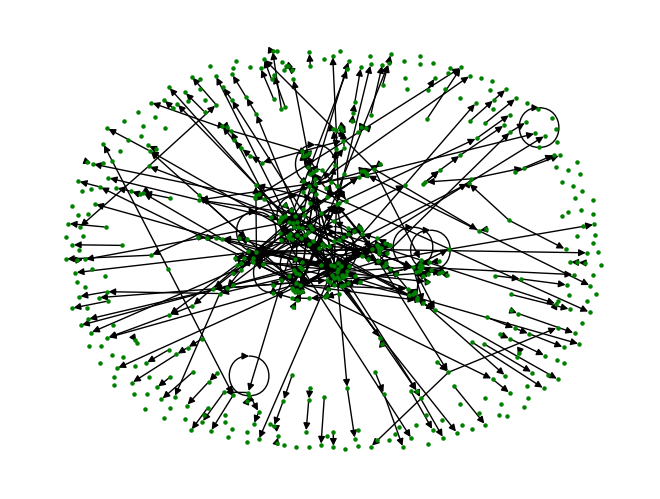

In [37]:
#Plote do grafo

df_new = df_new.sort_values(by="id_user")

G = nx.DiGraph()

for i in range(len(df_new)):
    if (i+1) < len(df_new) and df_new["id_user"][i] == df_new["id_user"][i+1]:
        origem = df['location_id'][i]
        destino = df['location_id'][i+1]
        G.add_edge(origem, destino)
    else:
        G.add_node(df['location_id'][i])

nx.draw(G, node_color='green', node_size=5)

In [38]:
#Plotar o novo mapa

#ideia: se o usuário tiver mais de um check-in, plotar uma linha entre os marcadores
#exemplo: id_user = 445

lat = df_new['latitude'][0]
long = df_new['longitude'][0]

mapa = folium.Map(location = [lat, long])
coordinates = []
coordinates_aux = []
z = 0

for num_users in freq_users:
    for i in range(z, z+num_users):
        z+=1
        coord_aux = []
        coord_aux.append(df_new['latitude'][i])
        coord_aux.append(df_new['longitude'][i])
        coordinates_aux.append(coord_aux)
    coordinates.append(coordinates_aux)
    coordinates_aux = []

for geom in coordinates:
    if len(geom) == 1:
        iframe = folium.IFrame(str(i))
        iframe = folium.IFrame(str(df_new['time'][i]))
        popup = folium.Popup(iframe, min_width=200, max_width=200)
        folium.Marker(location=[geom[0][0], geom[0][1]], popup=popup).add_to(mapa)
    else:
        for ponto in geom:
            iframe = folium.IFrame(str(i))
            iframe = folium.IFrame(str(df_new['time'][i]))
            popup = folium.Popup(iframe, min_width=200, max_width=200)
            folium.Marker(location=[ponto[0], ponto[1]], popup=popup).add_to(mapa)
        folium.PolyLine(locations=[geom], weight=5).add_to(mapa)
        
#mapa

In [43]:
#API OSM - Nominatim

def reverse_geocode(lat, lon, max_retries=5, retry_delay=2):
    url = 'https://nominatim.openstreetmap.org/reverse'
    params = {
        'lat': lat,
        'lon': lon,
        'format': 'geojson'
    }
    
    attempts = 0
    while attempts < max_retries:
        try:
            response = requests.get(url, params=params)
            response.raise_for_status() 
            return response.json()
        except requests.exceptions.RequestException as e:
            print(f"Error: {e}")
            attempts += 1
            if attempts < max_retries:
                print(f"Tentativa {attempts} falhou. Tentando novamente em {retry_delay} segundos...")
                time.sleep(retry_delay)
            else:
                print("Número máximo de tentativas atingido. A requisição falhou.")
                return None

#response.json()['features'][0]['properties']['type']
#result['features'][0]['properties']['category']
categorias = []
for i in range(len(df_new)):
    print(i)
    lat = df_new['latitude'][i]
    long = df_new['longitude'][i]
    result = reverse_geocode(lat, long)
    if result:
        categorias.append(result['features'][0]['properties']['type'])
        print(result['features'][0]['properties']['type'])

print(Counter(categorias))
 	

0
house
1
university
2
house
3
mall
4
parking
5
ice_cream
6
zoo
7
zoo
8
zoo
9
zoo
10
place_of_worship
11
fuel
12
apron
13
terminal
14
terminal
15
terminal
16
residential
17
place_of_worship
18
house
19
fast_food
20
commercial
21
house
22
motorway
23
convenience
24
house
25
terminal
26
parking
27
house
28
cafe
29
restaurant
30
house
31
house
32
house
33
house
34
parking
35
house
36
pub
37
house
38
picnic_table
39
house
40
yes
41
house
42
school
43
school
44
parking
45
commercial
46
commercial
47
restaurant
48
commercial
49
convenience
50
fuel
51
restaurant
52
commercial
53
house
54
commercial
55
parking
56
commercial
57
restaurant
58
parking
59
restaurant
60
house
61
house
62
fast_food
63
parking
64
parking
65
hotel
66
fast_food
67
restaurant
68
hotel
69
secondary
70
house
71
hotel
72
parking
73
house
74
boutique
75
fast_food
76
house
77
yes
78
service
79
common
80
tertiary
81
telecommunication
82
hotel
83
chemist
84
parking
85
hotel
86
university
87
mall
88
fast_food
89
house
90
hotel


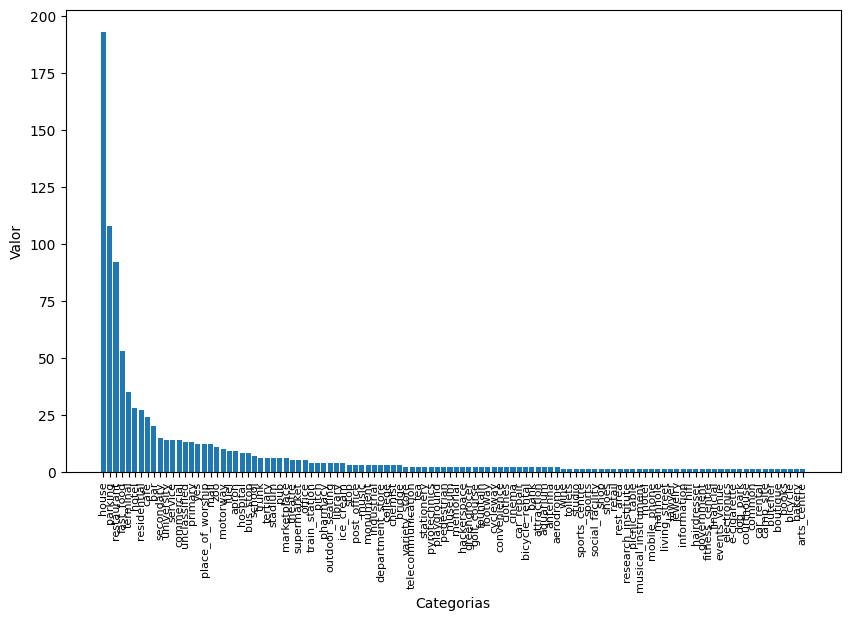

In [44]:
#Histograma
categ = Counter(categorias)
x = categ.keys()
y = categ.values()

y, x = zip(*sorted(zip(y, x), reverse=True))

plt.figure(figsize=(10,6))
plt.bar(x,y)
plt.xlabel('Categorias')
plt.xticks(rotation=90, fontsize=8)
plt.ylabel('Valor')

plt.show()

<Figure size 3000x600 with 0 Axes>

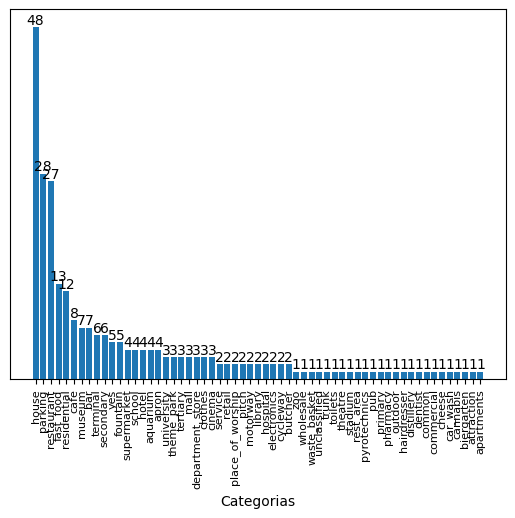

In [33]:
c = Counter({'house': 48, 'parking': 28, 'restaurant': 27, 'fast_food': 13, 'residential': 12, 'cafe': 8, 'museum': 7, 'bar': 7, 'terminal': 6, 'secondary': 6, 'yes': 5, 'fountain': 5, 'supermarket': 4, 'school': 4, 'apron': 4, 'aquarium': 4, 'hotel': 4, 'mall': 3, 'cinema': 3, 'tertiary': 3, 'university': 3, 'department_store': 3, 'clothes': 3, 'theme_park': 3, 'retail': 2, 'electronics': 2, 'butcher': 2, 'hospital': 2, 'library': 2, 'pitch': 2, 'service': 2, 'place_of_worship': 2, 'cycleway': 2, 'motorway': 2, 'waste_basket': 1, 'pharmacy': 1, 'common': 1, 'distillery': 1, 'commercial': 1, 'attraction': 1, 'theatre': 1, 'trunk': 1, 'cheese': 1, 'pub': 1, 'stadium': 1, 'pyrotechnics': 1, 'outdoor': 1, 'cannabis': 1, 'car_wash': 1, 'dentist': 1, 'zoo': 1, 'apartments': 1, 'primary': 1, 'rest_area': 1, 'unclassified': 1, 'toilets': 1, 'biergarten': 1, 'wholesale': 1, 'hairdresser': 1})

x = c.keys()
y = c.values()

y, x = zip(*sorted(zip(y, x), reverse=True))

# Criando o gráfico de barras
plt.figure(figsize=(30,6))
fig, ax = plt.subplots()
barras = ax.bar(x, y)

# Adicionando os valores no topo de cada barra
for barra in barras:
    altura = barra.get_height()
    ax.text(
        barra.get_x() + barra.get_width() / 2,  # Posição horizontal do texto
        altura,                                 # Posição vertical do texto
        f'{altura}',                            # Texto a ser exibido
        ha='center',                            # Alinhamento horizontal do texto
        va='bottom'                             # Alinhamento vertical do texto
    )
    
plt.xlabel('Categorias')
plt.xticks(rotation=90, fontsize=8)
plt.ylabel('Valor')
ax.yaxis.set_visible(False)
plt.show()